## practice on netflix dataset
- 📌 Part 1: Data Cleaning (Pandas + NumPy)

      Load the dataset into a DataFrame.

      Handle missing values (check how many in each column).

      Convert date_added into a proper datetime column.

      Create 2 new columns:

      year_added

      month_added

      Split the listed_in column into multiple genres (hint: .str.split(',')).

- 📌 Part 2: Data Analysis (Pandas)

      Answer these questions using Pandas:

      How many Movies vs TV Shows are there?

      Which year had the most content added to Netflix?

      What are the Top 10 genres?

      Who are the Top 10 directors with the most content?

      Which country has the highest number of Netflix titles?

- 📌 Part 3: Visualization (Matplotlib / Plotly)

      Make the following charts:

      Bar chart → Movies vs TV Shows.

      Line chart → Content growth over the years.

      Horizontal bar chart → Top 10 genres.

      Pie chart → Distribution of ratings (PG, R, etc.).

      Interactive bar chart (Plotly) → Top 10 countries with most content.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
df = pd.read_csv(r'D:\practice languages\python\ds cx\practice_DS\netflix_titles.csv')
df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])


In [18]:
df.head()
df['date_added'].isnull().sum()
df['date_added'] = df['date_added'].fillna(pd.Timestamp('2000-01-01'))


In [ ]:
df['date_added'].isnull().sum()

np.int64(0)

In [23]:
df['year_added']= df['date_added'].dt.year
df['year_month']= df['date_added'].dt.month

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,year_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [26]:
df['director']= df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  year_month    8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 894.6+ KB


### data analysis

In [28]:
# Movies vs TV Shows

print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [32]:
# Year with most content added
print(df['year_added'].value_counts().head(1))

year_added
2019    2016
Name: count, dtype: int64


In [35]:
# Top 10 directors
print(df['director'].value_counts().head(10))

director
unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


In [37]:
# Country with most content
print(df['country'].value_counts().head(5))

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
Name: count, dtype: int64


In [39]:
genres= df['listed_in'].str.split(',', expand=True).stack().str.strip()
print(genres.value_counts().head(5))

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


### Data visualisation

<Axes: ylabel='count'>

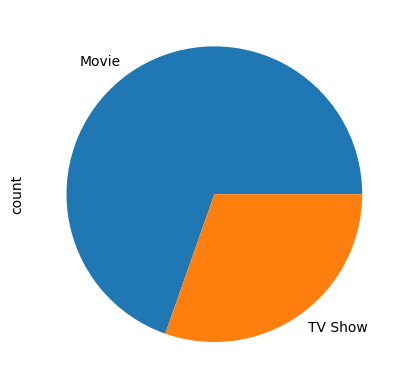

In [40]:
# 1. Movies vs TV Shows
df['type'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'content growth over the year')

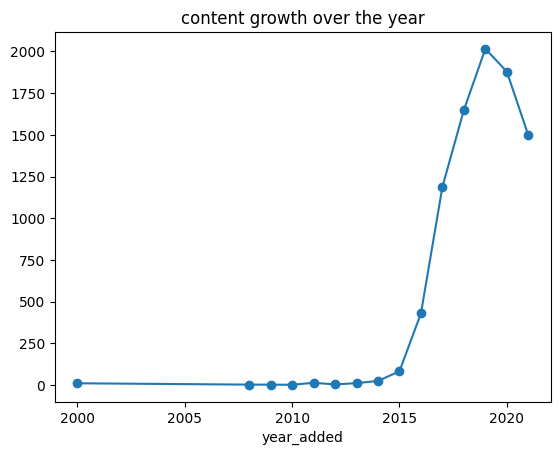

In [47]:
# 2. Content growth over years
df['year_added'].value_counts().sort_index().plot(kind='line' , marker='o')
plt.title('content growth over the year')

Text(0.5, 1.0, 'Top 10 genres')

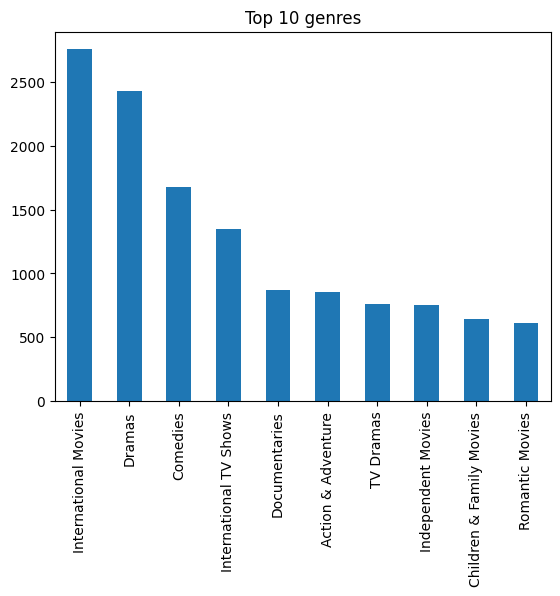

In [44]:
# 3. Top 10 Genres
genres.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 genres')

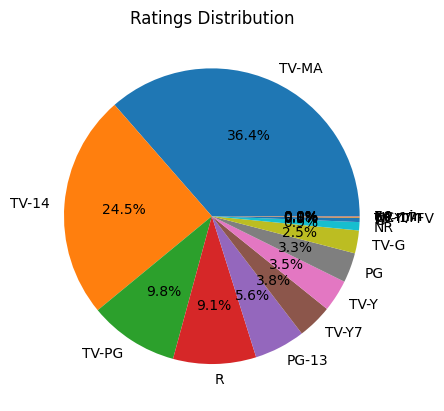

In [49]:
# 4. Ratings distribution
df['rating'].value_counts().plot(kind='pie' , autopct='%1.1f%%')
plt.ylabel("")
plt.title("Ratings Distribution")
plt.show()

In [57]:
# using plolty 
# 5. Interactive (Plotly) - Top 10 Countries

df_country= df['country'].value_counts().head(10).reset_index()
df_country.columns = ['country' , 'count']
df_country

px.bar(df_country, x='country' , y='count' , color='country')